In [7]:
# We'll be plotting the building permit activity Utah cities
# in the month of May by year. In order to do this, I'll be making
# a function that takes in a city and month, and returns a plot of that data.

In [21]:
# Import the depdendencies for this exercise.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [23]:
# Import seaborn to make things BeAuTiFuL
import seaborn as sb

In [9]:
# First, we'll need to import the permits sheet as a dataframe. The function will
# read from this data, trim the dataframe down to only the pertinant information,
# and return a plot of that data.
permits_df = pd.read_excel('permits.xlsx')

In [61]:
def plot_permits_on_month(cities, month):
    '''Using a given list of cities and a desired month, returns
    a plot of how many permits were allocated on that month for 
    each year in the data.'''
    
    # Begin by creating a new, empty figure. This figure will scale
    # to however many cities are in the list.
    fig, ax = plt.subplots(
        int(np.ceil(len(cities) / 2)),
        2
    )
    
    # Resize the figure
    plt.figure(figsize=(12, 9));
    
    fig.suptitle('%s Utah Dwelling Permits Assigned by Year' % month)
    
    for i, city in enumerate(cities):
        
        # Create a sliced frame with just the city and month.
        city_df = permits_df[
            (permits_df['City'] == city) &
            (permits_df['Month'] == month)
        ]
        
        axis = ax[int(i / 2)][i % 2]
               
        # Remove plot frame lines.
        axis.spines['top'].set_visible(False)
        # axis.spines['bottom'].set_visible(False)
        # axis.spines['left'].set_visible(False)
        axis.spines['right'].set_visible(False)
        
        # Plot the city's data with year on the x-axis and # of permits
        # on the y-axis.
        axis.plot(
            city_df['Year'],
            city_df['New Dwelling Units'],
            linestyle = '-',
            marker = 'o',
        )
        
        # Pretty up the graph information by adding axes and a title for each
        axis.set_xlabel('Year')
        axis.set_ylabel('New Permits')
        axis.set_title(city)
    
    fig.subplots_adjust(
        wspace = 0.4,
        hspace = 0.8
    )
     
    return fig

In [62]:
cities = [
    'Provo',
    'Orem',
    'Lehi',
    'Spanish Fork',
]

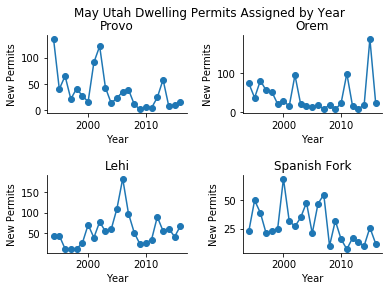

<Figure size 864x648 with 0 Axes>

In [63]:
cities_plot = plot_permits_on_month(cities, 'May')

In [66]:
cities_plot.savefig("permits_by_city.png")